In [12]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import interpolate
import matplotlib.pyplot as plt

In [13]:
class DataProcessor:
    independentvar=[]
    dependentvars=[]
    dependentvarsifunctions=[]
    hasbeeninterpolated=False
    def load_data(self,path,ivarname,dvarnames,toprow,bottomrow):
        """Call this method if you want to get your data from a csv file."""
        df = pd.read_csv(path)
        self.independentvar = df[ivarname].values[toprow:bottomrow]
        for n in dvarnames:
            self.dependentvars.append(df[n].values[toprow:bottomrow].tolist())
    def set_data(self,ivar,dvars):
        """Call this method if you want to set your data manually."""
        for lst in dvars:
            if len(ivar) != len(lst):
                raise ValueError("Lengths of all dependent variable lists must be the same size as the independent variable list!")
        if isinstance(dvars,np.ndarray):
            dvars = dvars.tolist()
        for (i,lst) in enumerate(dvars):
            if isinstance(lst,np.ndarray):
                dvars[i] = lst.tolist()
        self.independentvar = ivar
        self.dependentvars = dvars
    def plot_values(self,name="",axis="off"):
        """This method plots your data using pyplot."""
        plt.title(name)
        plt.axis(axis)
        for lst in self.dependentvars:
            plt.plot(self.independentvar,lst)
        plt.show()
    def create_interpolation_functions(self):
        """This method creates interpolation functions for each of the dependent variables. 
        It is required for any other interpolation methods."""
        if(len(self.independentvar) == len(set(self.independentvar))):
            for lst in self.dependentvars:
                self.dependentvarsifunctions.append(interpolate.interp1d(self.independentvar,lst))
            self.hasbeeninterpolated = True
        else:
            raise ValueError("Repeat X Values Detected within dataset!")
    def get_interpolated_dataprocessor(self,values=0,ivals = None):
        """This returns a new, interpolated DataProcessor as long as the current dataprocessor has called
        create_interpolation_functions at least once with the current dependent variable set. 
        If that method hasn't been called, this method will throw an error."""
        if(self.hasbeeninterpolated == True):
            ndependents=[]
            if ivals != None:
                ndependents = [self.dependentvarsifunctions[i](ivals) for i in range(len(self.dependentvarsifunctions))]
                dp2 = DataProcessor()
                dp2.set_data(ivals,ndependents)
                return dp2
            elif values != 0:
                thing=np.linspace(self.independentvar.min(),self.independentvar.max(),values)
                ndependents = [self.dependentvarsifunctions[i](thing) for i in range(len(self.dependentvarsifunctions))]
                dp2 = DataProcessor()
                dp2.set_data(thing,ndependents)
                return dp2
        else:
            raise AttributeError("Interpolation functions have not been created!")
    def get_interpolated_dependents(self,values = 0,ivals = None):
        """This returns a new dependent variable list as long as the current dataprocessor has called
        create_interpolation_functions at least once with the current dependent variable set. 
        If that method hasn't been called, this method will throw an error."""
        if(self.hasbeeninterpolated == True):
            if ivals != None:
                ndependents = [self.dependentvarsifunctions[i](ivals) for i in range(len(self.dependentvarsifunctions))]
                return ndependents
            elif values != 0:
                thing=np.linspace(self.independentvar.min(),self.independentvar.max(),values)
                ndependents = [self.dependentvarsifunctions[i](thing) for i in range(len(self.dependentvarsifunctions))]
                return ndependents
        else:
            raise AttributeError("Interpolation functions have not been created!")
    def keep_only_nth_indexes(self,n):
        """This goes through the DataProcessor's arrays and keeps only the nth indexes in all of 
        the DataProcessor's vvariable-containing arrays"""
        self.independentvar = self.independentvar[::n]
        for i in range(len(self.dependentvars)):
            self.dependentvars[i] = self.dependentvars[i][::n]
    def remove_nth_indexes(self,n):
        """This goes through the DataProcessor's arrays and removes the nth indexes in all of 
        the DataProcessor's variable-containing arrays"""
        tmplst = self.independentvar.tolist()
        del tmplst[::n]
        self.independentvar = np.array(tmplst)
        for i in range(len(self.dependentvars)):
            del self.dependentvars[i][::n]
    def remove_specific_index(self,n):
        """This removes a specific index from all of the DataProcessor's variable-containing arrays"""
        tmplst = self.independentvar.tolist()
        del tmplst[n]
        self.independentvar = np.array(tmplst)
        for i in range(len(self.dependentvars)):
            del self.dependentvars[i][n]
    def remove_index_range(self,minindex,maxindex):
        """This removes a range of indexes from all of the DataProcessor's variable-containing arrays"""
        self.independentvar = np.append(self.independentvar[:minindex],self.independentvar[maxindex:])
        for i in range(len(self.dependentvars)):
            del self.dependentvars[i][minindex:maxindex]
    def add_new_dependent_var(self,ndvar):
        if len(self.independentvar) != len(ndvar):
            raise ValueError("Lengths of dependent variable list must be the same size as the independent variable list!")
        if isinstance(ndvar, np.ndarray):
            self.dependentvars.append(ndvar).tolist()
        elif isinstance(ndvar, list):
            self.dependentvars.append(ndvar)
        self.dependentvarsifunctions=[]
        self.hasbeeninterpolated=False

In [14]:
dp = DataProcessor()
dp.load_data('../Combined_Two_Port_Check_Standard.csv',
             "Frequency",
             ["magS11","magS21","magS22"],
             0,
             543)

In [15]:
dp.keep_only_nth_indexes(3)
print dp.independentvar
print dp.dependentvars

[  0.05   0.1    0.2    0.3    0.4    0.5    0.6    0.7    0.8    0.9    1.
   1.1    1.2    1.3    1.4    1.5    1.6    1.7    1.8    1.9    2.     2.1
   2.2    2.3    2.4    2.5    2.6    2.7    2.8    2.9    3.     3.1    3.2
   3.3    3.4    3.5    3.6    3.7    3.8    3.9    4.     4.1    4.2    4.3
   4.4    4.5    4.6    4.7    4.8    4.9    5.     5.1    5.2    5.3    5.4
   5.5    5.6    5.7    5.8    5.9    6.     6.1    6.2    6.3    6.4    6.5
   6.6    6.7    6.8    6.9    7.     7.1    7.2    7.3    7.4    7.5    7.6
   7.7    7.8    7.9    8.     8.1    8.2    8.3    8.4    8.5    8.6    8.7
   8.8    8.9    9.     9.1    9.2    9.3    9.4    9.5    9.6    9.7    9.8
   9.9   10.    10.1   10.2   10.3   10.4   10.5   10.6   10.7   10.8   10.9
  11.    11.1   11.2   11.3   11.4   11.5   11.6   11.7   11.8   11.9   12.
  12.1   12.2   12.3   12.4   12.5   12.6   12.7   12.8   12.9   13.    13.1
  13.2   13.3   13.4   13.5   13.6   13.7   13.8   13.9   14.    14.1   14.2
 

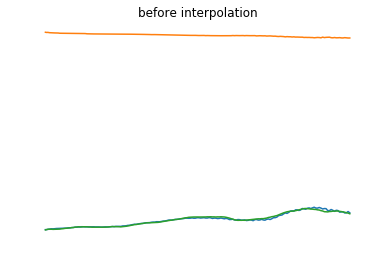

In [16]:
dp.plot_values(name="before interpolation")

In [17]:
dp.create_interpolation_functions()

In [18]:
nivar = np.linspace(dp.independentvar.min(),dp.independentvar.max(),50)
ndvars = dp.get_interpolated_dependents(ivals = nivar)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:64: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [19]:
dpi = DataProcessor()
dpi.set_data(nivar,ndvars)

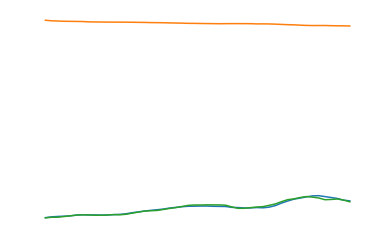

In [20]:
dpi.plot_values()

In [21]:
print dpi.independentvar
dpi.remove_index_range(0,3)
print dpi.independentvar
dpi.remove_specific_index(0)
print dpi.independentvar
dpi.remove_nth_indexes(4)
print dpi.independentvar

[  0.05         0.41632653   0.78265306   1.14897959   1.51530612
   1.88163265   2.24795918   2.61428571   2.98061224   3.34693878
   3.71326531   4.07959184   4.44591837   4.8122449    5.17857143
   5.54489796   5.91122449   6.27755102   6.64387755   7.01020408
   7.37653061   7.74285714   8.10918367   8.4755102    8.84183673
   9.20816327   9.5744898    9.94081633  10.30714286  10.67346939
  11.03979592  11.40612245  11.77244898  12.13877551  12.50510204
  12.87142857  13.2377551   13.60408163  13.97040816  14.33673469
  14.70306122  15.06938776  15.43571429  15.80204082  16.16836735
  16.53469388  16.90102041  17.26734694  17.63367347  18.        ]
[  1.14897959   1.51530612   1.88163265   2.24795918   2.61428571
   2.98061224   3.34693878   3.71326531   4.07959184   4.44591837
   4.8122449    5.17857143   5.54489796   5.91122449   6.27755102
   6.64387755   7.01020408   7.37653061   7.74285714   8.10918367
   8.4755102    8.84183673   9.20816327   9.5744898    9.94081633
  10.3071

In [22]:
dpi.add_new_dependent_var(range(50))

ValueError: Lengths of dependent variable list must be the same size as the independent variable list!